
### <center>Тактико-Техническое задание<center>

##### <center>рассмотрим формирование технического задания на проектирование разгонного РДТТ<center>
<center>необходимо получить графики зависимости скорости и перегрузки от времени и сформировать ттз</center>

In [6]:
import math as math
from scipy.integrate import ode
import numpy as np
import matplotlib.pyplot as plt

##### <center>Исходные данные<center>

In [7]:
 g = 9.80665;
 tyagyaVooruj = 14.5;
 m0 = 49; 
 v_k = 375;
 v_n = 60; 
 max_peregr = 20;
 t_p = 2.5; 
 I_ud = 2600; 
 hi = 0.85; 
 tetta = 10; 
 t_0 = 0

##### <center>Далее идут расчеты относительного запаса топлива, массы топлива, тяги и импульсов<center>

In [8]:
def Mu(v_k, v_n, hi, I_ud):
   e = math.e;
   mu = (1 - e ** (-(v_k - v_n) / (hi * I_ud)));
   return mu;


##### <center>заметь, что при косопоставленном сопле нужно домножить тягу на косинус, по моему скромному мнению, в основном, косопоставленные сопла используются в птурах<center>

In [9]:
mass_topl = Mu(v_k, v_n, hi, I_ud) * m0;
P_kos = tyagyaVooruj*m0*g*math.cos(20 * math.pi / 180)
I_summ = P_kos*t_p
I_ud_pereschitannoe = I_summ/mass_topl

##### <center>вывод значений<center>


In [10]:
print('Тяга с учетом косопоставленного сопла: ', P_kos)
print('запас топлива: ', Mu(v_k, v_n, hi, I_ud))
print('масса топлива: ', mass_topl)
print('суммарный импульс: ', I_summ)
print('удельный импульс: ',I_ud_pereschitannoe)

Тяга с учетом косопоставленного сопла:  6547.425632457206
запас топлива:  0.1328418746502701
масса топлива:  6.509251857863235
суммарный импульс:  16368.564081143015
удельный импульс:  2514.6613525745884


##### <center>всеми любимое интегрирование оду, использую пакет скипи, самому в падлу реализовывать<center>
###### <center>сначала задаем функции для тяги и массы, потом функцию для интегрирования, задаем начальные условия, у меня вылет из тпк, поэтому начальная скорость = 60 <center>

In [17]:
# определение функций
def P(tyagyaVooruj):
    return tyagyaVooruj * m0 * g

def m(t, t_p):
    return m0 - (mass_topl * t / t_p)

def dVdt(t, V):
    return ((hi * P(tyagyaVooruj)) / m(t, t_p)) - g * np.sin(np.radians(tetta))

# начальные условия
t0 = 0
V0 = 60

# задание объекта для интегрирования с помощью метода Рунге-Кутты 4 порядка
solver = ode(dVdt)
solver.set_initial_value(V0, t0)

# задание временных рамок
tspan = np.linspace(t0, t_p, 500)

# интегрирование уравнения
V = np.zeros_like(tspan)
V[0] = V0
nx = [12]

for i, t in enumerate(tspan[1:]):
    k = hi * P(tyagyaVooruj) /( m(t, t_p)*g)
    nx.append(k)

    V[i+1] = solver.integrate(t)
    if not solver.successful():
        break

# вывод решения
# print(V)
# print(tspan)
# print(nx)

##### <center>тут еще один приколдес у федорова в методе, при высчитывании nx, значения получаются в G, так что не забудь поделить на 10(я уже сделал это в коде)<center>


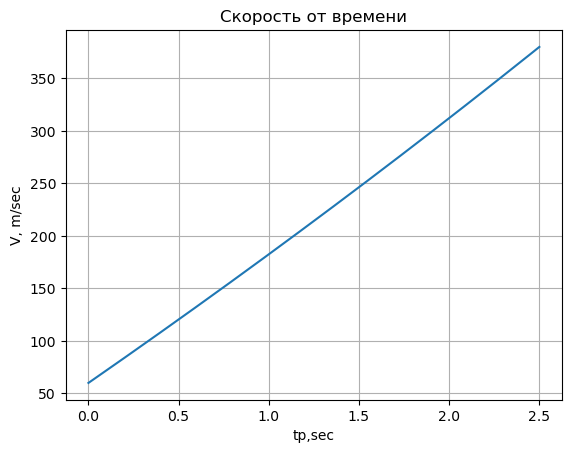

In [23]:

# создаем массивы
x = np.array(tspan)
y = np.array(V)

# создаем график
plt.plot(x, y)
plt.grid(True)

# добавляем заголовок и название осей
plt.title('Скорость от времени')
plt.xlabel('tp,sec')
plt.ylabel('V, m/sec')

# выводим график на экран
plt.show()

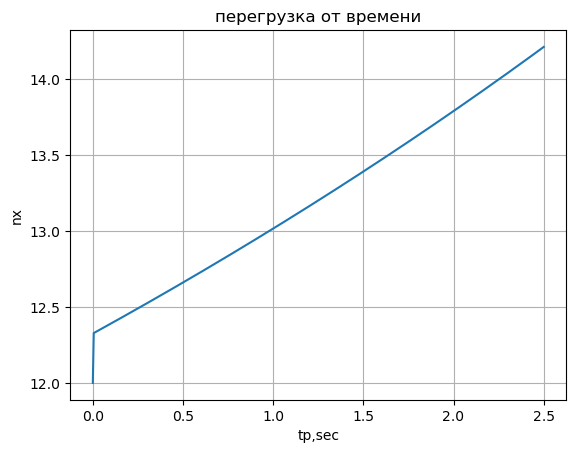

In [25]:
# создаем массивы
x = np.array(tspan)
y = np.array(nx)
y = y[:len(x)]
# создаем график
plt.plot(x, y)
plt.grid(True)

# добавляем заголовок и название осей
plt.title('перегрузка от времени')
plt.xlabel('tp,sec')
plt.ylabel('nx')

# выводим график на экран
plt.show()

####
Тактико – техническое задание
Спроектировать однорежимный двигатель на твердом топливе для ПТУР, который обеспечивает создание суммарного импульса 16,9 кН ∙ с за время не менее 2,4 с. Обеспечить функционирование двигателя в диапазоне температур ∆𝑇 = −50 … + 50℃. Максимальный разброс тяг от номинального значения не должен превышать 15%. Максимальный диаметр двигательной установки 0,14 м, максимальная длина 0,4 м. Масса двигательной установки не более 9,5 кг.
Специальные требования к типу топлива не предъявляются. 


##### <center> Иншааллах, все получится)<center>